In [1]:
import pandas as pd
import numpy as np 
from gpxutils import parse_gpx 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Analysis of Cycling Data

We are provided with four files containing recordings of cycling activities that include GPS location data as
well as some measurements related to cycling performace like heart rate and power.  The goal is to perform
some exploration and analysis of this data. 

The data represents four races.  Two are time trials where the rider rides alone on a set course.  Two are 
road races where the rider rides with a peleton.  All were held on the same course but the road races include
two laps where the time trials include just one. 

Questions to explore with the data:
* What is the overall distance travelled for each of the rides? What are the average speeds etc.  Provide a summary for each ride.
* Compare the range of speeds for each ride, are time trials faster than road races? 
* Compare the speeds achieved in the two time trials (three years apart).  As well as looking at the averages, can you see where in the ride one or the other is faster.  
* From the elevation_gain field you can see whether the rider is _climbing_ , _descending_ or on the _flat_.   Use this to calculate the average speeds in those three cases (climbing, flat or descending).  Note that _flat_ might not be zero elevation_gain but might allow for slight climbs and falls.  

For time varying data like this it is often useful to _smooth_ the data using eg. a [rolling mean](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.rolling_mean.html).  You might want to experiment with smoothing in some of your analysis (not required but may be of interest).

## Description of Fields

* _index_ is a datetime showing the time that the observation was made (I wasn't riding at night, this is converted to UTC)
* __latitude, longitude, elevation__ from the GPS, the position of the rider at each timepoint, elevation in m
* __temperature__ the current ambient temperature in degrees celcius
* __power__ the power being generated by the rider in Watts
* __cadence__ the rotational speed of the pedals in revolutions per minute
* __hr__ heart rate in beats per minute
* __elevation_gain__ the change in elevation in m between two observations
* __distance__ distance travelled between observations in km
* __speed__ speed measured in km/h

You are provided with code in [gpxutils.py](gpxutils.py) to read the GPX XML format files that are exported by cycling computers and applications.  The sample files were exported from [Strava](https://strava.com/) and represent four races by Steve Cassidy.


In [2]:
# read the four data files
rr_2016 = parse_gpx('files/Calga_RR_2016.gpx')
tt_2016 = parse_gpx('files/Calga_TT_2016.gpx')
rr_2019 = parse_gpx('files/Calga_RR_2019.gpx')
tt_2019 = parse_gpx('files/Calga_TT_2019.gpx')

## Question 1

What is the overall distance travelled for each of the rides? What are the average speeds etc. Provide a summary for each ride.

In [3]:
#returning a count of the distance travelled
print("Overall Distance Travelled for rr_2016: ", rr_2016['distance'].count()/100,"km")
print("Overall Distance Travelled for tt_2016: ", tt_2016['distance'].count()/100,"km")
print("Overall Distance Travelled for rr_2019: ", rr_2019['distance'].count()/100,"km")
print("Overall Distance Travelled for tt_2019: ", tt_2019['distance'].count()/100,"km")

Overall Distance Travelled for rr_2016:  28.22 km
Overall Distance Travelled for tt_2016:  15.41 km
Overall Distance Travelled for rr_2019:  55.03 km
Overall Distance Travelled for tt_2019:  26.55 km


similar distance travelled for all except rr_2019

In [4]:
#calculating the average speed
print("Average speed for rr_2016: ", rr_2016['speed'].mean())
print("Average speed for tt_2016: ", tt_2016['speed'].mean())
print("Average speed for rr_2019: ", rr_2019['speed'].mean())
print("Average speed for tt_2019: ", tt_2019['speed'].mean())

Average speed for rr_2016:  34.93308475482947
Average speed for tt_2016:  33.52996304869014
Average speed for rr_2019:  33.87986137188044
Average speed for tt_2019:  33.05782378815691


all very similar speeds

In [5]:
#A brief description of the data in rr_2016
rr_2016.describe()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
count,2822.000000,2822.000000,2822.000000,2822.000000,2822.0,2822.000000,2822.000000,2822.000000,2822.000000,2822.000000,2821.000000
mean,-33.368017,151.225527,232.404465,25.280652,0.0,65.987952,158.394401,0.017381,-0.003756,34.933085,1.843318
std,0.028329,0.006014,29.725934,1.348746,0.0,34.425881,11.304588,0.015695,0.458872,10.738677,1.692364
min,-33.416753,151.211496,176.000000,24.000000,0.0,0.000000,102.000000,0.000000,-1.600000,0.000000,1.000000
25%,-33.393691,151.221912,209.450000,24.000000,0.0,68.000000,151.000000,0.007894,-0.400000,26.656312,1.000000
50%,-33.371820,151.227236,226.100000,25.000000,0.0,79.000000,158.000000,0.011794,0.000000,33.307339,1.000000
75%,-33.342269,151.230069,258.200000,26.000000,0.0,87.000000,166.000000,0.016899,0.400000,42.871885,2.000000
max,-33.316890,151.235131,295.800000,30.000000,0.0,117.000000,205.000000,0.076283,1.200000,92.749036,9.000000


In [6]:
#A brief description of the data in tt_2016
tt_2016.describe()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
count,1541.000000,1541.000000,1541.000000,1541.000000,1541.0,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000,1540.000000
mean,-33.368105,151.225411,139.068657,10.953277,0.0,83.277093,170.939650,0.016095,-0.002466,33.529963,1.783766
std,0.028055,0.006166,30.301132,0.657937,0.0,21.169978,23.392548,0.015897,0.515343,11.519681,1.822713
min,-33.418368,151.211206,85.000000,10.000000,0.0,0.000000,100.000000,0.000000,-7.400000,0.000000,1.000000
25%,-33.393795,151.221870,116.200000,11.000000,0.0,77.000000,157.000000,0.007622,-0.400000,25.068271,1.000000
50%,-33.370613,151.227333,134.000000,11.000000,0.0,86.000000,161.000000,0.010974,0.000000,32.840076,1.000000
75%,-33.343332,151.230072,165.400000,11.000000,0.0,96.000000,180.000000,0.015960,0.400000,41.470522,2.000000
max,-33.316888,151.235137,202.600000,13.000000,0.0,118.000000,251.000000,0.288175,2.400000,162.505764,31.000000


In [7]:
#A brief description of the data in rr_2019
rr_2019.describe()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
count,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5503.000000,5502.0
mean,-33.371644,151.225232,243.243576,5.997819,213.617845,70.004906,138.998546,0.009411,0.000254,33.879861,1.0
std,0.030592,0.006142,30.197981,0.806414,144.123686,29.869938,16.184123,0.002459,0.347322,8.853503,0.0
min,-33.422174,151.211507,185.200000,0.000000,0.000000,0.000000,71.000000,0.000000,-2.000000,0.000000,1.0
25%,-33.396939,151.221591,219.600000,5.000000,104.000000,66.000000,129.000000,0.007839,-0.200000,28.219962,1.0
50%,-33.373835,151.227064,236.000000,6.000000,212.000000,81.000000,142.000000,0.009178,0.000000,33.041360,1.0
75%,-33.344994,151.229977,269.600000,7.000000,308.000000,89.000000,152.000000,0.010733,0.200000,38.640026,1.0
max,-33.316865,151.235094,310.400000,7.000000,785.000000,120.000000,170.000000,0.019547,1.000000,70.370469,1.0


In [8]:
#A brief description of the data in tt_2019
tt_2019.describe()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
count,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2655.000000,2654.0
mean,-33.368391,151.225397,250.435104,10.194350,257.566855,89.979661,152.741243,0.009183,0.000377,33.057824,1.0
std,0.028682,0.006234,29.434104,0.833934,80.023555,17.543883,8.217632,0.002715,0.298628,9.773522,0.0
min,-33.415798,151.211507,195.800000,9.000000,0.000000,0.000000,88.000000,0.000000,-1.600000,0.000000,1.0
25%,-33.394910,151.221400,229.200000,10.000000,213.500000,88.000000,150.000000,0.007345,-0.200000,26.440757,1.0
50%,-33.370118,151.227363,243.800000,10.000000,264.000000,94.000000,153.000000,0.009228,0.000000,33.220108,1.0
75%,-33.343803,151.230040,276.200000,10.000000,308.000000,98.000000,158.000000,0.010913,0.200000,39.286242,1.0
max,-33.316882,151.235098,312.200000,13.000000,522.000000,111.000000,166.000000,0.017584,0.600000,63.300734,1.0


Overall, all 4 rides differ from eachother. Each ride has a different distance travelled but are all done at a similar speed.
The Road Races from 2016 and 2019 are both varying distances, the same can be applied for the Time Trials. The main similarities between all 4 data groups are the speeds.

## Question 2
Compare the range of speeds for each ride, are time trials faster than road races?

In [9]:
#calculating the range of speeds by getting the max and subtracting the min
print("Range of speed for rr_2016: ", round(rr_2016['speed'].max() - rr_2016['speed'].min(),2),"km")
print("Range of speed for tt_2016: ", round(tt_2016['speed'].max() - tt_2016['speed'].min(),2),"km")
print("Range of speed for rr_2019: ", round(rr_2019['speed'].max() - rr_2019['speed'].min(),2),"km")
print("Range of speed for tt_2019: ", round(tt_2019['speed'].max() - tt_2019['speed'].min(),2),"km")

Range of speed for rr_2016:  92.75 km
Range of speed for tt_2016:  162.51 km
Range of speed for rr_2019:  70.37 km
Range of speed for tt_2019:  63.3 km


The minimun value for all speed is obviously 0, therefore this is somewhat pointless as you cannot calculate the range accurately. However, tt_2016 is faster than rr_2016, and the fastest overall. tt_2019 is infact slower than rr_2019

## Question 3
Compare the speeds achieved in the two time trials (three years apart). As well as looking at the averages, can you see where in the ride one or the other is faster.

In [10]:
#calculating the range of speeds for both time trials
print("Average of speed for tt_2016: ", round(tt_2016['speed'].mean(), 2),"km")
print("Average of speed for tt_2019: ", round(tt_2019['speed'].mean(), 2),"km")

Average of speed for tt_2016:  33.53 km
Average of speed for tt_2019:  33.06 km


In [11]:
# speed variable without outliers 
tt_2016cleanspeed = tt_2016[(tt_2016.speed < 80)]
tt_2019cleanspeed = tt_2019[(tt_2019.speed < 80)]

In [12]:
#making the data more readable for a plot by using the rolling method
tt2016rolling = tt_2016.rolling(2).sum()
tt2019rolling = tt_2019.rolling(2).sum()

<AxesSubplot:>

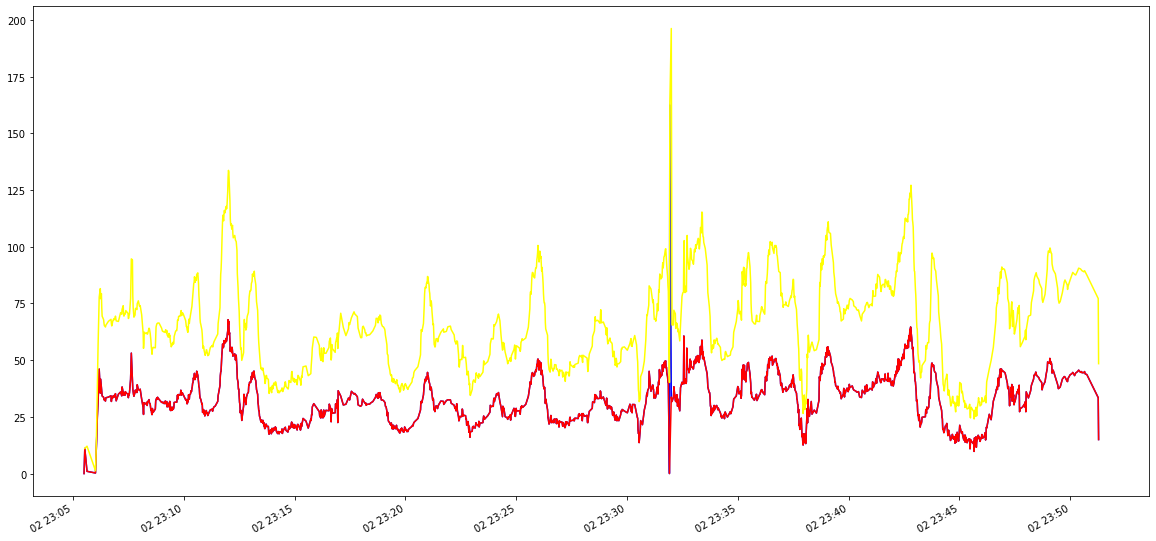

In [13]:
#a comparison between the rolled TT and raw TT data. From looking at the plot, it allows for the data to become more accurate 
#and places the speed at a more reasonable level
plt.figure(figsize = (20,10))
tt_2016['speed'].plot(color = 'blue')
tt_2016cleanspeed['speed'].plot(color = 'red')
tt2016rolling['speed'].plot(color = 'yellow')

<AxesSubplot:>

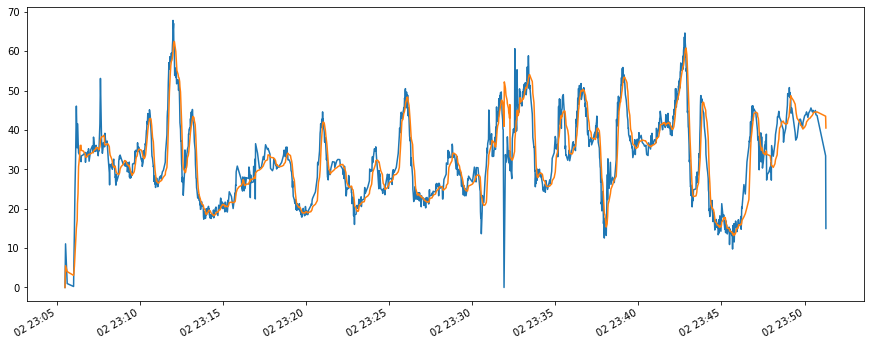

In [14]:
# speed variable without outliers
plt.figure(figsize=(15, 6))
tt_2016cleanspeed = tt_2016[(tt_2016.speed < 80)]
#plot without outliers, compare to plot above
tt_2016cleanspeed['speed'].plot()


tt_2016.rolling(10, min_periods = 1)['speed'].mean().plot()
#rolling data compared with non rolled data

<AxesSubplot:xlabel='tt_2019_Speed'>

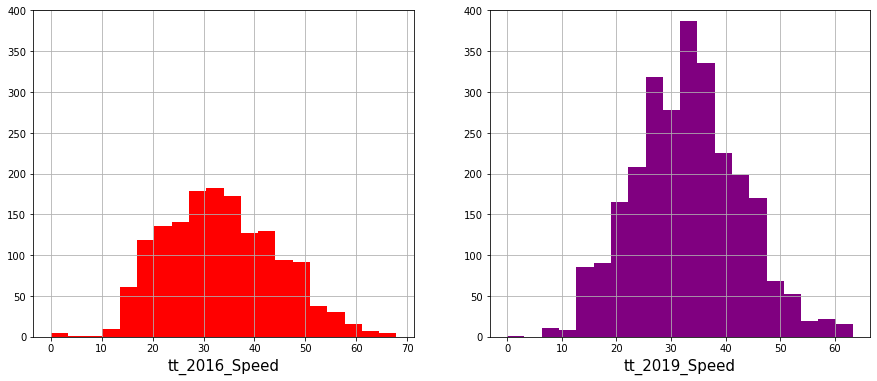

In [15]:
#a histogram is used to compare the speeds between tt_2016 and tt_2019. A histogram allows for better visualisation and
#distribution of the data.
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
plt.ylim(0,400)
plt.xlabel('tt_2016_Speed', size = 15)
tt_2016cleanspeed.speed.hist(histtype = 'stepfilled', bins = 20, color = 'red')
plt.subplot(1,2,2)
plt.ylim(0,400)
plt.xlabel('tt_2019_Speed', size = 15)
tt_2019cleanspeed.speed.hist(histtype = 'stepfilled', bins = 20, color = 'purple')

The histogram above can represent the rolled data, and shows that the speed is overall higher in the tt_2019 data set, but in tt_2016 the speed is evenly distributed. This could be for a number of reasons such as evelations, and how tired the rider was at the time.

## Question 4

From the elevation_gain field you can see whether the rider is climbing , descending or on the flat. Use this to calculate the average speeds in those three cases (climbing, flat or descending). Note that flat might not be zero elevation_gain but might allow for slight climbs and falls.

In [16]:
#creating the elevation status for calculation
tt_2016Flat = tt_2016[(tt_2016.elevation_gain == 0)]
tt_2016Gain = tt_2016[(tt_2016.elevation_gain > 0)]
tt_2016Loss = tt_2016[(tt_2016.elevation_gain < 0)]

In [17]:
#calculating the speed dependent on the elevation.
print("Average Speed for tt_2016 at 0 elevation", round(tt_2016Flat['elevation_gain'].mean() + tt_2016['speed'].mean(),2),"km")
print("Average Speed for tt_2016 at > 0 elevation", round(tt_2016Gain['elevation_gain'].mean() + tt_2016['speed'].mean(),2),"km")
print("Average Speed for tt_2016 at < 0 elevation", round(tt_2016Loss['elevation_gain'].mean() + tt_2016['speed'].mean(),2),"km")

Average Speed for tt_2016 at 0 elevation 33.53 km
Average Speed for tt_2016 at > 0 elevation 33.99 km
Average Speed for tt_2016 at < 0 elevation 32.9 km


<AxesSubplot:title={'center':'tt_2016_Elevation'}>

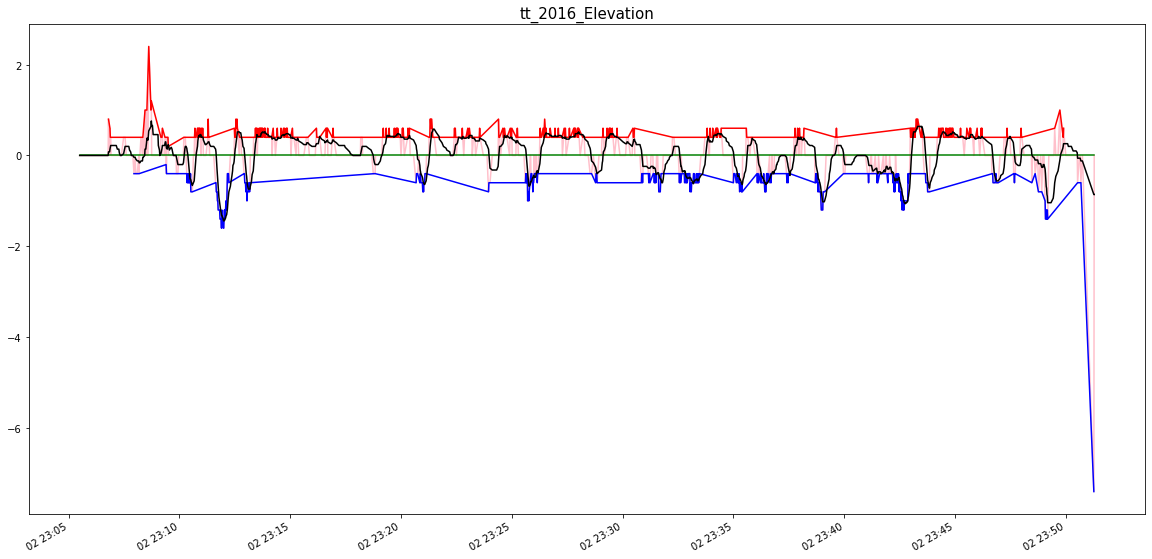

In [18]:
#a good visualisation of the data from all elevation points created before. I have also added the elevation data with the
#rolling method applied to see how the data is manipulated once cleaned.
plt.figure(figsize = (20,10))
plt.title('tt_2016_Elevation', size = 15)
tt_2016['elevation_gain'].plot(color = 'pink')
tt_2016Flat['elevation_gain'].plot(color = 'green')
tt_2016Gain['elevation_gain'].plot(color = 'red')
tt_2016Loss['elevation_gain'].plot(color = 'blue')
tt_2016.rolling(10, min_periods = 1)['elevation_gain'].mean().plot(color = 'black')

In [19]:
#creating the elevation status for calculation
rr_2016Flat = rr_2016[(rr_2016.elevation_gain == 0)]
rr_2016Gain = rr_2016[(rr_2016.elevation_gain > 0)]
rr_2016Loss = rr_2016[(rr_2016.elevation_gain < 0)]

In [20]:
#calculating the speed dependent on the elevation.
print("Average Speed for rr_2016 at 0 elevation", round(rr_2016Flat['elevation_gain'].mean() + tt_2016['speed'].mean(),2),"km")
print("Average Speed for rr_2016 at > 0 elevation", round(rr_2016Gain['elevation_gain'].mean() + tt_2016['speed'].mean(),2),"km")
print("Average Speed for rr_2016 at < 0 elevation", round(rr_2016Loss['elevation_gain'].mean() + tt_2016['speed'].mean(),2),"km")

Average Speed for rr_2016 at 0 elevation 33.53 km
Average Speed for rr_2016 at > 0 elevation 33.98 km
Average Speed for rr_2016 at < 0 elevation 32.96 km


In [21]:
#creating the elevation status for calculation
tt_2019Flat = tt_2019[(tt_2019.elevation_gain == 0)]
tt_2019Gain = tt_2019[(tt_2019.elevation_gain > 0)]
tt_2019Loss = tt_2019[(tt_2019.elevation_gain < 0)]

In [22]:
#calculating the speed dependent on the elevation.
print("Average Speed for tt_2019 at 0 elevation", round(tt_2019Flat['elevation_gain'].mean() + tt_2019['speed'].mean(),2),"km")
print("Average Speed for tt_2019 at > 0 elevation", round(tt_2019Gain['elevation_gain'].mean() + tt_2019['speed'].mean(),2),"km")
print("Average Speed for tt_2019 at < 0 elevation", round(tt_2019Loss['elevation_gain'].mean() + tt_2019['speed'].mean(),2),"km")

Average Speed for tt_2019 at 0 elevation 33.06 km
Average Speed for tt_2019 at > 0 elevation 33.32 km
Average Speed for tt_2019 at < 0 elevation 32.7 km


In [23]:
#creating the elevation status for calculation
rr_2019Flat = rr_2019[(rr_2019.elevation_gain == 0)]
rr_2019Gain = rr_2019[(rr_2019.elevation_gain > 0)]
rr_2019Loss = rr_2019[(rr_2019.elevation_gain < 0)]

In [24]:
#calculating the speed dependent on the elevation.
print("Average Speed for rr_2019 at 0 elevation", round(rr_2019Flat['elevation_gain'].mean() + rr_2019['speed'].mean(),2),"km")
print("Average Speed for rr_2019 at > 0 elevation", round(rr_2019Gain['elevation_gain'].mean() + rr_2019['speed'].mean(),2),"km")
print("Average Speed for rr_2019 at < 0 elevation", round(rr_2019Loss['elevation_gain'].mean() + rr_2019['speed'].mean(),2),"km")

Average Speed for rr_2019 at 0 elevation 33.88 km
Average Speed for rr_2019 at > 0 elevation 34.17 km
Average Speed for rr_2019 at < 0 elevation 33.48 km


## Challenge: Gear Usage

A modern race bike has up to 22 different gears with two chainrings on the front (attached to the pedals) and 10 or 11 at the back (attached to the wheel).   The ratio of the number of teeth on the front and rear cogs determines the distance travelled with one revolution of the pedals (often called __development__, measured in metres).  Low development is good for climbing hills while high development is for going fast downhill or in the final sprint. 

We have a measure of the number of rotations of the pedals per minute (__cadence__) and a measure of __speed__.  Using these two variables we should be able to derive a measure of __development__ which would effectivly tell us which gear the rider was using at the time.   Development will normally range between __2m__ and __10m__.  Due to errors in GPS and cadence measurements you will see many points outside this range and you should just discard them as outliers. 

Write code to calculate __development__ in _meters_ for each row in a ride.  Plot the result in a _histogram_ and compare the plots for the four rides.   Comment on what you observe in the histograms.





In [25]:
#cast to individual variables
cadence = tt_2016['cadence']
speed = tt_2016['speed']

In [26]:
#make an attempt at calculating
development = cadence/speed
print("development according to time is as follows: ", development)

development according to time is as follows:  2016-07-02 23:05:30+00:00           inf
2016-07-02 23:05:32+00:00      5.230345
2016-07-02 23:05:38+00:00     58.510120
2016-07-02 23:06:01+00:00    232.320363
2016-07-02 23:06:02+00:00     11.319958
                                ...    
2016-07-02 23:50:39+00:00      2.223179
2016-07-02 23:50:41+00:00      2.255888
2016-07-02 23:50:45+00:00      0.000000
2016-07-02 23:51:16+00:00      1.912419
2016-07-02 23:51:17+00:00      4.267855
Length: 1541, dtype: float64


this is a simple calculation, but we can assume, from a range of 2m to 10m, that the rider was generally in gear 2-4.